# ***C/NC DNA Detecting Code***

---



> This code to detect the coding and noncoding sequances (4-kmers) using chaos game representation, Chaos game representation (CGR) is an iterative mapping technique that assigns each nucleotide in a DNA sequence to a respective position on the plane in a one-to-one manner. **bold text

Name:

Mohamed Ahmed Mohamed Emam 1910038

Amna Ali Shaheen Mohamed   1920053

Master students, faculty of computer science, Nile University






In [0]:
#Importing_reqiured_libraries
%matplotlib inline
import numpy as np
import os
import imageio
import matplotlib.pylab as plt
import math
import pandas as pd
from collections import defaultdict
from pathlib import Path
from numpy.random import seed
import sys
import matplotlib.cm as cm
import pylab
ep = sys.float_info.epsilon
import seaborn as sn
from sklearn import metrics
from sklearn import model_selection
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [44]:
#Retrieve_the_data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We collected a total of 80 sequences as training data from 10 mammalian species(40 coding sequence and 40 non-coding intron parts) 

Gene names: CSN1S1, IL2, LCE6A and SMCP

We collected also total of 40 sequences as testing data from 10 mammalian species(20 coding sequence and 20 non-coding intron parts) 

Gene names: STK11 and TP53



In [0]:
#chaos_game_representation_images_constractucted_using_the_following_cgr_pakage_out_source_from_https://github.com/dognjen/chaos-game-representation/blob/master/ChaosGameRepresentation.py
#We_generated_cgr_image_data_twice_with_k(n)=3_and_k(n)=4
def cgr(inputdir,outputdir):
    k=4             # number of combinations
    s=2**k          # size of the matrix

    bases = ["A", "C", "G", "T"]
    def cartesian(nucleotides):
        """ Create a cartesian product from variable nucleotides. """
        if not nucleotides:
            yield ""
        else:
            for a in nucleotides[0]:
                for b in cartesian(nucleotides[1:]):
                    yield a + b


    def count(sequence, sub):
        counter = 0
        for i in range(len(sequence) - len(sub) + 1):
            if sequence[i:i + len(sub)] == sub:
                counter += 1
        return counter


    def k_mer_probability(sequence, bases):
        probabilities = {}
        for b in bases:
            probabilities[b] = count(sequence, b) / float(len(sequence) - len(b) + 1)
        return probabilities


    def fill_matrix_with_probabilities(bases, depth, row, column, nuk):

        if depth == 0:
            mat[column[0]][row[0]] = (ver[nuk])
            return []
        else:
            for b in bases:
                if b in ['A', 'C']:
                    r = row[:len(row)//2]
                else:
                    r = row[len(row)//2:]
                if b in ['A', 'T']:
                    c = column[:len(column)//2]
                else:
                    c = column[len(column)//2:]
                fill_matrix_with_probabilities(bases, depth - 1, r, c, nuk + b)
            return []


    if __name__ == "__main__":
        fasta = open(inputdir)
        fasta = fasta.read()

        # create a matrix in which to represent the combinations
        mat = np.array([[0.0 for i in range(s)] for j in range(s)], float)

        # fill the matrix with probabilities, as you can tell by the function name
        sequence = "".join(fasta.split("\n")[1:])

        # remove unknown nucleotides
        sequence = sequence.replace("N", "")

        # Create all possible k combinations of base nucleotides
        combinations = list(cartesian([bases] * k))

        # Calculate the probability (k-mer) of all combinations in a given sequence
        ver = k_mer_probability(sequence, combinations)

        print(ver,"\n")
        print(fasta,"\n")
        fill_matrix_with_probabilities(bases, k, [int(i) for i in range(s)], [int(i) for i in range(s)], '')

        # visualization, 
        pylab.imshow(mat, extent=[0, s, 0, s], interpolation='nearest', cmap=cm.gray)
        x_os = [a + 0.4 for a in range(s)]
        y_os = [a + 0.4 for a in range(s)]
        label_x = [str(i) for i in range(s)]
        label_y = [str(i) for i in range(s-1, -1, -1)]
        pylab.xticks(x_os, label_x)
        pylab.yticks(y_os, label_y)
        return pylab.savefig(outputdir)



In [0]:
#Constracution_of_training_coding_seq
path="/content/drive/My Drive/project/ML_cgr_data/train/coding_seq/seq"
os.chdir(path)
coding_test_seq=os.listdir()
for i in coding_test_seq:
    cgr(path+i, path+i+'.png')

#Constracution_of_training_non_coding_seq
path="/content/drive/My Drive/project/ML_cgr_data/train/non_codingseq/seq"
os.chdir(path)
coding_test_seq=os.listdir()
for i in coding_test_seq:
    cgr(path+i, path+i+'.png')

#Constracution_of_testing_coding_seq
path="/content/drive/My Drive/project/ML_cgr_data/test/coding/seq"
os.chdir(path)
coding_test_seq=os.listdir()
for i in coding_test_seq:
    cgr(path+i, path+i+'.png')

#Constracution_of_testing_coding_seq
path="/content/drive/My Drive/project/ML_cgr_data/test/noncoding/seq"
os.chdir(path)
coding_test_seq=os.listdir()
for i in coding_test_seq:
    cgr(path+i, path+i+'.png')

#We_will_attach_the_output_cgr_data_on_Nile_university_module_and_you_can_find_it_on_google_drive_in_the_link_below:
#https://drive.google.com/drive/folders/1cAMKoKg03kKOmxaggMFxnCBhobF8Xddt?usp=sharing

after start anything, we must create two lists : 

---



1. inp_out_needed list : contains all data frame that, we will create in the next step that contain coding & noncoding of train & test cgr images.

2. paths list : that contain path of each data (coding & noncoding of train & test cgr images) on your google drive.


 

In [0]:
inp_out_needed=['train_coding_df1','train_noncoding_df1','test_coding_df1','test_noncoding_df1']
paths={'train_coding_df1':'/content/drive/My Drive/project/ML_cgr_data/train/coding_seq','train_noncoding_df1':'/content/drive/My Drive/project/ML_cgr_data/train/non_codingseq','test_coding_df1':'/content/drive/My Drive/project/ML_cgr_data/test/coding','test_noncoding_df1':'/content/drive/My Drive/project/ML_cgr_data/test/noncoding'}

***First*** : read each CGR image and flat it to row in data frame to intilization machine learning processing


In [0]:
# df_image is a subfunction to create data frame from read each CGR image where each row is one image

In [0]:
def df_image(Images):
  Images1=sorted(Images) # sort them ascendingly 
  ImagF=np.zeros((len(Images),497664))  # All Images
  for i in range(len(Images1)):
      ImagF_1=imageio.imread(Images1[i])
      ImagF[i,:]=ImagF_1.reshape((1,497664))
  return pd.DataFrame(ImagF)

***Second*** : Assgin class to coding and noncoding images to can make classification

In [0]:
# clas_assign is a subfunction to assign class 1 (one) to each coding cgr images data frame and class 0 (zero) to  noncoding cgr images data frame

In [0]:
def clas_assign(Images,c,b):
  c= df_image(Images)
  if b.split('_')[1] =='coding':
    c['y']=np.ones((len(c)))
  elif b.split('_')[1] =='noncoding':
    c['y']=np.zeros((len(c)))
  return c

***Third***: Create Train & Test Data Frame that contain coding and noncoding images :

train data frame = train coding cgr image (with class one ) + train noncoding cgr image (with class zero )

 &
  test data frame = test coding cgr image (with class one ) + test noncoding cgr image (with class zero )
  
  
  By two step A & B & C

In [0]:
#A- For loop to make data frame from taking different types of images (coding & noncoding) from different folder (tain & test)  

In [0]:
for c in inp_out_needed:
  b=c
  home_path = os.getcwd()
  path=paths[c]
  os.chdir(path)
  Images=os.listdir()
  exec('{} = clas_assign(Images,c,b)'.format(c))

In [0]:
# B- Merge codind & noncoding traing data (after assign class to each one ) in one train data frame and
# codind & noncoding testing data (after assign class to each one ) in one test data frame 

In [0]:
# merge coding sequence of train data to noncoding sequence of train data to obtain training sequence data frame
train_coding_noncoding1=pd.concat([train_coding_df1,train_noncoding_df1])
# merge coding sequence of test data to noncoding sequence of test data to obtain testing sequence data frame
test_coding_noncoding1=pd.concat([test_coding_df1,test_noncoding_df1])

In [0]:
# C - split train dataframe (from step B ) to X_train (data) & y_train (labeles) variables to can start machine learning classification

In [0]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [0]:
# D- Statistical Data Analysis :

In [0]:
X_train_mean=np.mean(X_train)
print('mean = ',X_train_mean)
X_train_median=np.median(X_train)
print('median =',X_train_median)

mean =  0         255.0
1         255.0
2         255.0
3         255.0
4         255.0
          ...  
497659    255.0
497660    255.0
497661    255.0
497662    255.0
497663    255.0
Length: 497664, dtype: float64
median = 255.0


In [0]:
df_resultcol=['NaiveBayes','logistic regression','KNN','Perceptron']
df_resultrow=['Accuracy','Cross_Validation','Confusion_Matrix','Sensitivity','Specificity']

In [51]:
df_result=pd.DataFrame(columns=df_resultcol,index=df_resultrow)
df_result

,NaiveBayes,logistic regression,KNN,Perceptron
Accuracy,NaN,NaN,NaN,NaN
Cross_Validation,NaN,NaN,NaN,NaN
Confusion_Matrix,NaN,NaN,NaN,NaN
Sensitivity,NaN,NaN,NaN,NaN
Specificity,NaN,NaN,NaN,NaN


In [0]:
# E- feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [0]:
# F- Statistical Data Analysis after Scalling:

In [0]:
X_train_mean=np.mean(X_train)
print('mean = ',X_train_mean)
X_train_median=np.median(X_train)
print('median =',X_train_median)

mean =  -1.3298208127954922e-19
median = 0.0


***Forth*** : Apply different type of classification :

1- Naive Bayes Classifier (supervised linear classifier)

2- Logistic regression (supervised linear classifier)

3- k-nearst neighbor classifier ( supervised nonlinear classifier)

4- perceptron (supervised linear classifier)



In [0]:
#1- Naive Bayes Classifier

In [0]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [0]:
# E- feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [55]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_n = GaussianNB()

# Train the model using the training sets
model_n.fit(X_train, y_train)

#Predict Output
y_pred_nai = model_n.predict(X_test) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_naiv=confusion_matrix(y_test,y_pred_nai)
cm_naiv

array([[ 5, 15],
       [ 0, 20]])

In [57]:
#Sensitivity_(True positive rate TPR) 
TP_nav= cm_naiv[0][0]
FN_nav= cm_naiv[1][0]
TPR_nav= TP_nav/(TP_nav+FN_nav) * 100
print("Sensitivity "+str(TPR_nav)+'%')

Sensitivity 100.0%


In [58]:
#Specificity(Total Negative Result TNR)
TN_nav= cm_naiv[1][1]
FP_nav= cm_naiv[0][1] 
TNR_nav = TN_nav/(TN_nav+FP_nav) * 100
print("Specificity "+str(TNR_nav)+'%')

Specificity 57.14285714285714%


Text(0.5, 1.0, 'Confusion Matrix Naive Bayes')

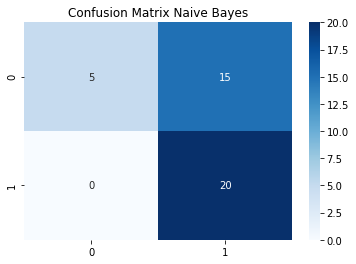

In [59]:
os.chdir(home_path)
cm_picture_nav=sn.heatmap(pd.DataFrame(cm_naiv),cmap="Blues", annot=True)
figure1 = cm_picture_nav.get_figure()   
plt.title("Confusion Matrix Naive Bayes")
figure1.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_NaiveBayes_4kmers.jpg', dpi=400)

In [60]:
model_n.score(X_test, y_test)

0.625

In [61]:
#Calculate Accuracy and Print it
accu_navie=sum([1 for i, j in zip(y_pred_nai, y_test) if i == j])/len(y_test)
print("Accuracy = " ,accu_navie*100, "%")

Accuracy =  62.5 %


In [62]:
# calculating the mean R^2 for a set of predictions:
results_naiv = model_selection.cross_val_score(model_n, X_train, y_train,cv=None)
results_naiv

array([0.875 , 1.    , 0.9375, 0.75  , 0.625 ])

In [63]:
df_result['NaiveBayes']=pd.Series({'Accuracy':accu_navie,'Cross_Validation':results_naiv,'Confusion_Matrix':cm_naiv,'Sensitivity':TPR_nav,'Specificity':TNR_nav})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron
Accuracy,0.625,NaN,NaN,NaN
Cross_Validation,"[0.875, 1.0, 0.9375, 0.75, 0.625]",NaN,NaN,NaN
Confusion_Matrix,"[[5, 15], [0, 20]]",NaN,NaN,NaN
Sensitivity,100,NaN,NaN,NaN
Specificity,57.1429,NaN,NaN,NaN


In [0]:
#2- logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [0]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [0]:
clf =linear_model.LogisticRegression().fit(X_train, y_train)

In [0]:
y_pred_log1=clf.predict(X_test)

In [68]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_logistic=confusion_matrix(y_test,y_pred_log1)
cm_logistic

array([[20,  0],
       [ 2, 18]])

In [69]:
#Sensitivity_(True positive rate TPR) 
TP_log= cm_logistic[0][0]
FN_log= cm_logistic[1][0]
TPR_log= TP_log/(TP_log+FN_log) * 100
print("Sensitivity "+str(TPR_log)+'%')

Sensitivity 90.9090909090909%


In [70]:
#Specificity(Total Negative Result TNR)
TN_log= cm_logistic[1][1]
FP_log= cm_logistic[0][1] 
TNR_log = TN_log/(TN_log+FP_log) * 100
print("Specificity "+str(TNR_log)+'%')

Specificity 100.0%


Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

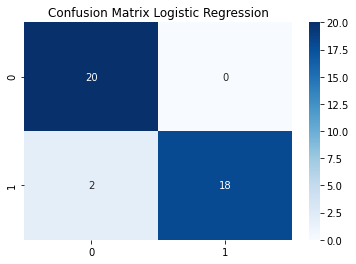

In [71]:
os.chdir(home_path)
cm_picture_logistic=sn.heatmap(pd.DataFrame(cm_logistic),cmap="Blues", annot=True)
figure1 = cm_picture_logistic.get_figure()   
plt.title("Confusion Matrix Logistic Regression")
figure1.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_Logistic_4kmers.jpg', dpi=400)

In [72]:
#Calculate Accuracy and Print it
accu_log=sum([1 for i, j in zip(y_pred_log1, y_test) if i == j])/len(y_test)
print("Accuracy = " ,accu_log*100, "%")

Accuracy =  95.0 %


In [73]:
clf.score(X_test, y_test)

0.95

In [74]:
# calculating the mean R^2 for a set of predictions:
results_log = model_selection.cross_val_score(clf, X_train, y_train,cv=5, scoring='r2')
results_log

array([0.5, 1. , 1. , 1. , 1. ])

In [75]:
df_result['logistic regression']=pd.Series({'Accuracy': accu_log,'Cross_Validation':results_log,'Confusion_Matrix':cm_logistic,'Sensitivity':TPR_log,'Specificity':TNR_log})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron
Accuracy,0.625,0.95,NaN,NaN
Cross_Validation,"[0.875, 1.0, 0.9375, 0.75, 0.625]","[0.5, 1.0, 1.0, 1.0, 1.0]",NaN,NaN
Confusion_Matrix,"[[5, 15], [0, 20]]","[[20, 0], [2, 18]]",NaN,NaN
Sensitivity,100,90.9091,NaN,NaN
Specificity,57.1429,100,NaN,NaN


In [0]:
# 3- KNN:

In [0]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [0]:
# E- feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
neigh = KNeighborsClassifier(n_neighbors=25, metric= 'euclidean')
neigh.fit(X_train, y_train)

preds1 = neigh.predict(X_test)
preds1.shape


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

(40,)

In [79]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,preds1)
cm_knn

array([[14,  6],
       [ 0, 20]])

In [80]:
#Sensitivity_(True positive rate TPR) 
TP_knn= cm_knn[0][0]
FN_knn= cm_knn[1][0]
TPR_knn= TP_knn/(TP_knn+FN_knn) * 100
print("Sensitivity "+str(TPR_knn)+'%')

Sensitivity 100.0%


In [81]:
#Specificity(Total Negative Result TNR)
TN_knn= cm_knn[1][1]
FP_knn= cm_knn[0][1] 
TNR_knn = TN_knn/(TN_knn+FP_knn) * 100
print("Specificity "+str(TNR_knn)+'%')

Specificity 76.92307692307693%


Text(0.5, 1.0, 'Confusion Matrix KNN')

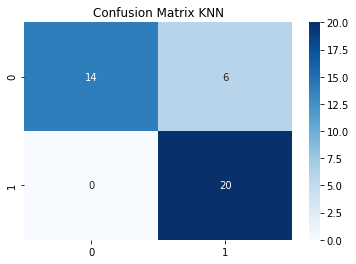

In [82]:
os.chdir(home_path)
cm_picture2=sn.heatmap(pd.DataFrame(cm_knn),cmap="Blues", annot=True)
figure2 = cm_picture2.get_figure()   
plt.title("Confusion Matrix KNN")
figure2.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_KNN_4kmers.jpg', dpi=400)

In [83]:
#Calculate Accuracy and Print it
accu_knn=sum([1 for i, j in zip(preds1, y_test) if i == j])/len(y_test)
print("Accuracy = " ,accu_knn*100, "%")

Accuracy =  85.0 %


In [84]:
neigh.score(X_test, y_test)

0.85

**Cross Validation**

Cross-validation consists in repetively splitting the data in pairs of train and test sets, called ‘folds’. Scikit-learn comes with a function to automatically compute score on all these folds. Here we do KFold with k=5.

In [0]:
np.random.shuffle(train_coding_noncoding1)
np.random.shuffle(test_coding_noncoding1)

In [0]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [85]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5)
cross_val_knn=cross_val_score(neigh,X_train, y_train, cv=cv)
cross_val_knn

array([0.875, 0.75 , 0.75 , 1.   , 0.75 ])

In [86]:
df_result['KNN']=pd.Series({'Accuracy':accu_knn,'Cross_Validation':cross_val_knn,'Confusion_Matrix':cm_knn,'Sensitivity':TPR_knn,'Specificity':TNR_knn})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron
Accuracy,0.625,0.95,0.85,NaN
Cross_Validation,"[0.875, 1.0, 0.9375, 0.75, 0.625]","[0.5, 1.0, 1.0, 1.0, 1.0]","[0.875, 0.75, 0.75, 1.0, 0.75]",NaN
Confusion_Matrix,"[[5, 15], [0, 20]]","[[20, 0], [2, 18]]","[[14, 6], [0, 20]]",NaN
Sensitivity,100,90.9091,100,NaN
Specificity,57.1429,100,76.9231,NaN


In [0]:
# 4- Perceptron

In [0]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [88]:
from sklearn.linear_model import Perceptron
per=Perceptron(max_iter=100, eta0=0.01,shuffle=True)
per.fit(X_train, y_train)
Test_y=pd.Series(per.predict(X_test), name='y')

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_per=confusion_matrix(y_test,Test_y)
cm_per

array([[16,  4],
       [ 0, 20]])

In [91]:
#Sensitivity_(True positive rate TPR) 
TP_per= cm_per[0][0]
FN_per= cm_per[1][0]
TPR_per= TP_per/(TP_per+FN_per) * 100
print("Sensitivity "+str(TPR_per)+'%')

Sensitivity 100.0%


In [92]:
#Specificity(Total Negative Result TNR)
TN_per= cm_per[1][1]
FP_per= cm_per[0][1] 
TNR_per = TN_per/(TN_per+FP_per) * 100
print("Specificity "+str(TNR_per)+'%')

Specificity 83.33333333333334%


Text(0.5, 1.0, 'Confusion Matrix Perceptron')

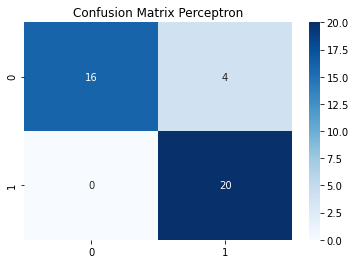

In [93]:
os.chdir(home_path)
cm_picture4=sn.heatmap(pd.DataFrame(cm_per),cmap="Blues", annot=True)
figure4 = cm_picture4.get_figure()   
plt.title("Confusion Matrix Perceptron")
figure4.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_Perceptron_4kmers.jpg', dpi=400)

In [94]:
per.score(X_test, y_test)

0.9

In [95]:
#Calculate Accuracy and Print it
accu_per=sum([1 for i, j in zip(Test_y, y_test) if i == j])/len(y_test)
print("Accuracy = " ,accu_per*100, "%")

Accuracy =  90.0 %


In [96]:
# calculating the mean R^2 for a set of predictions:
results_per = model_selection.cross_val_score(per, X_train, y_train,cv=5, scoring='r2')
results_per

array([0.75, 1.  , 1.  , 1.  , 1.  ])

In [97]:
df_result['Perceptron']=pd.Series({'Accuracy':accu_per,'Cross_Validation':results_per,'Confusion_Matrix':cm_per,'Sensitivity':TPR_per,'Specificity':TNR_per})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron
Accuracy,0.625,0.95,0.85,0.9
Cross_Validation,"[0.875, 1.0, 0.9375, 0.75, 0.625]","[0.5, 1.0, 1.0, 1.0, 1.0]","[0.875, 0.75, 0.75, 1.0, 0.75]","[0.75, 1.0, 1.0, 1.0, 1.0]"
Confusion_Matrix,"[[5, 15], [0, 20]]","[[20, 0], [2, 18]]","[[14, 6], [0, 20]]","[[16, 4], [0, 20]]"
Sensitivity,100,90.9091,100,100
Specificity,57.1429,100,76.9231,83.3333


# Fifth: Model Selection

In This project we try to select best model for coding/noncoding DNA detection by two methods:
1. from built in outsource function from (https://scipy-lectures.org/packages/scikit-learn/index.html)
2. aggergate above result from each model in new data frame called **df_result**

In [0]:
# 1. outsourcing code

In [100]:
from sklearn import model_selection
from sklearn import metrics
for Model in [GaussianNB, LogisticRegression,KNeighborsClassifier,Perceptron]:
    clfsa = Model().fit(X_train, y_train)
    y_pred_model = clfsa.predict(X_test)
    print('%s: %s' % 
          (Model.__name__, metrics.f1_score(y_pred_model, y_test, average="macro"))) 

GaussianNB: 0.5636363636363637
LogisticRegression: 0.949874686716792
KNeighborsClassifier: 0.34523809523809523
Perceptron: 0.898989898989899


In [0]:
# 2. Create df_result to collect result on it:

In [99]:
df_result

,NaiveBayes,logistic regression,KNN,Perceptron
Accuracy,0.625,0.95,0.85,0.9
Cross_Validation,"[0.875, 1.0, 0.9375, 0.75, 0.625]","[0.5, 1.0, 1.0, 1.0, 1.0]","[0.875, 0.75, 0.75, 1.0, 0.75]","[0.75, 1.0, 1.0, 1.0, 1.0]"
Confusion_Matrix,"[[5, 15], [0, 20]]","[[20, 0], [2, 18]]","[[14, 6], [0, 20]]","[[16, 4], [0, 20]]"
Sensitivity,100,90.9091,100,100
Specificity,57.1429,100,76.9231,83.3333


# **Conclusion**:

In conclusion, from point 1 and 2 , from Sensitivity and cross validation the Perceptron is the best, and from Accuracy the Logistic regression is the best.

So, In this project we conclude Perceptron and logistic regression ( supervised learning, linear clasifier ) are the best models for detecting coding DNA sequences from noncoding DNA sequences using chaos game represntation approach. may be because the logistic regression & perceptron is an algorithms for learning a binary classifier, and gradient descent to reach best decision boundary.